# Probing Many-Body Dynamics on Pulser

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import qutip

from pulser import Pulse, Sequence, Register
from pulser.waveforms import CompositeWaveform, RampWaveform, ConstantWaveform
from pulser.devices import Chadoq2, Mock
from pulser.simulation import Simulation

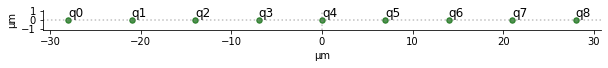

In [101]:
reg = Register.rectangle(1,9, spacing=7, prefix='q')
reg.draw()

In [115]:
# Parameters in MHz and ns
#U = 1 * 2*np.pi  # btw 1-3 Mhz*2pi. Should we include this VdW magnitude in an AFM-type Simulation?

delta_0 = -10 * 2*np.pi
delta_f = 10 * 2*np.pi
Omega_max = 2.0 * 2*np.pi  # btw 1.8-2 Mhz*2pi
t_rise = 60.
t_stop = 220.
t_end = 300.

## Z2 order: Creating the Pulse Sequence

In [116]:
hold = ConstantWaveform(t_rise, delta_0)
excite = RampWaveform(t_stop - t_rise, delta_0, delta_f)
sweep = Pulse.ConstantAmplitude(Omega_max, CompositeWaveform(hold, excite), 0.)
stay = Pulse.ConstantPulse(t_end - t_stop, 0., delta_f, 0.)

Channel: ising
t: 0 | Initial targets: q3, q2, q1, q5, q0, q6, q4 | Phase Reference: 0.0 
t: 0->220 | Pulse(Amp=12.6 MHz, Detuning=Composite(ConstantWaveform(60 ns, -62.8 MHz), RampWaveform(160 ns, -62.8->62.8 MHz)), Phase=0) | Targets: q3, q2, q1, q5, q0, q6, q4
t: 220->300 | Pulse(Amp=0 MHz, Detuning=62.8 MHz, Phase=0) | Targets: q3, q2, q1, q5, q0, q6, q4




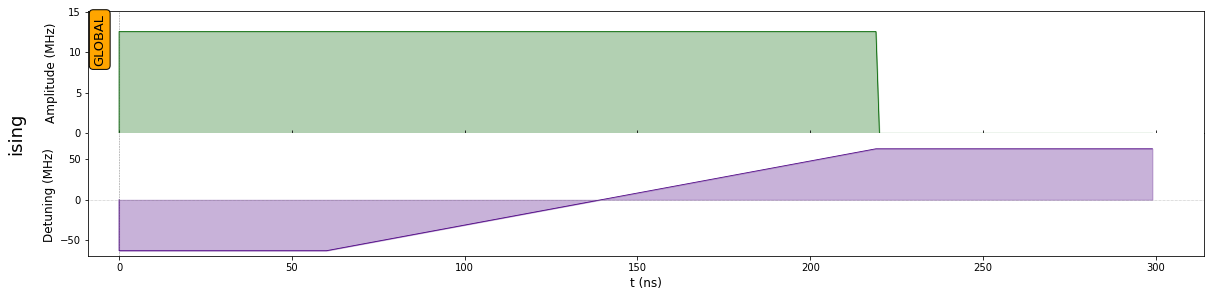

In [117]:
seq = Sequence(reg, Mock)
seq.declare_channel('ising', 'rydberg_global')

seq.add(sweep, 'ising')
seq.add(stay, 'ising')

print(seq)
seq.draw()

## Simulation

(Running with `nsteps = 1000`, `max_step=20`)

In [118]:
simul = Simulation(seq)

In [119]:
up = qutip.basis(2,0)
def occupation(j):
    prod = [qutip.qeye(2) for _ in range(simul._size)]
    prod[j] = up*up.dag()
    return qutip.tensor(prod)
    
occup_list = [occupation(j) for j in range(simul._size)]

In [120]:
simul.run(obs_list=occup_list, progress_bar=True)

Observables provided. Calculating expectation value...
10.0%. Run time:   0.35s. Est. time left: 00:00:00:03
20.0%. Run time:   0.65s. Est. time left: 00:00:00:02
30.0%. Run time:   1.01s. Est. time left: 00:00:00:02
40.0%. Run time:   1.48s. Est. time left: 00:00:00:02
50.0%. Run time:   2.05s. Est. time left: 00:00:00:02
60.0%. Run time:   2.72s. Est. time left: 00:00:00:01
70.0%. Run time:   3.50s. Est. time left: 00:00:00:01
80.0%. Run time:   4.39s. Est. time left: 00:00:00:01
90.0%. Run time:   5.29s. Est. time left: 00:00:00:00
Total run time:   6.17s


In [121]:
res = np.zeros((len(reg.qubits),int(t_end)))
for i,expv in enumerate(simul.output.expect):
    for t in range(int(t_end)):
        res[i,t] = expv[t] 

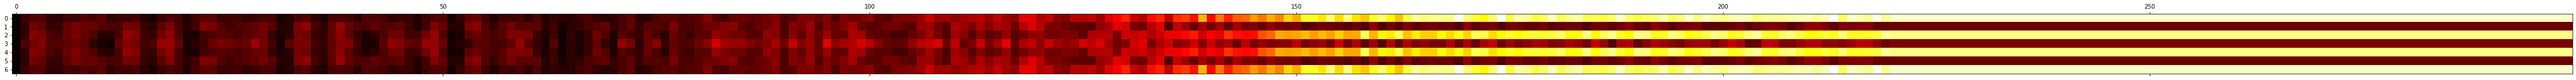

In [122]:
plt.figure(figsize=(80,50))
plt.matshow(res, cmap='hot', fignum=1)
plt.show()

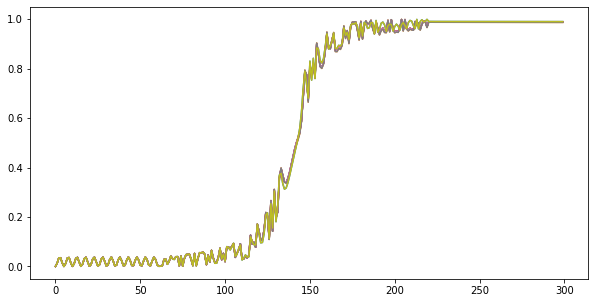

In [110]:
plt.figure(figsize=(10,5))
for expv in simul.output.expect:
    plt.plot(expv)

# Rydberg Crystals: Z3 Order

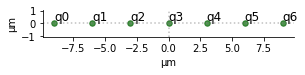

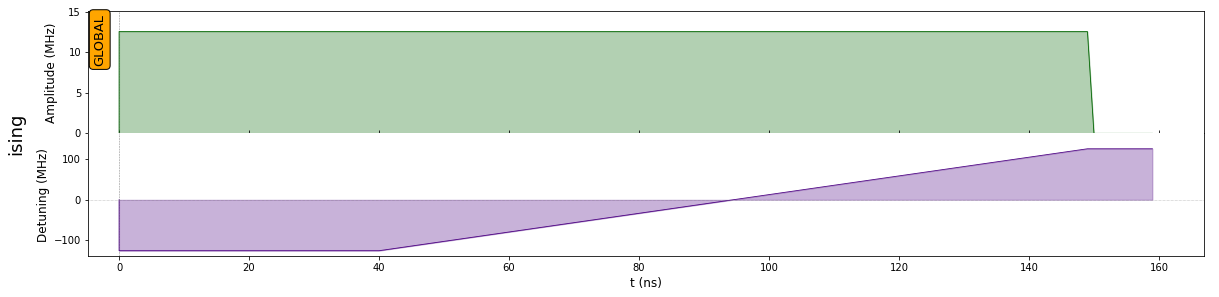

Observables provided. Calculating expectation value...
10.0%. Run time:   0.28s. Est. time left: 00:00:00:02
20.0%. Run time:   0.56s. Est. time left: 00:00:00:02
30.0%. Run time:   0.83s. Est. time left: 00:00:00:01
40.0%. Run time:   1.03s. Est. time left: 00:00:00:01
50.0%. Run time:   1.15s. Est. time left: 00:00:00:01
60.0%. Run time:   1.23s. Est. time left: 00:00:00:00
70.0%. Run time:   1.47s. Est. time left: 00:00:00:00
80.0%. Run time:   1.85s. Est. time left: 00:00:00:00
90.0%. Run time:   2.43s. Est. time left: 00:00:00:00
Total run time:   3.07s


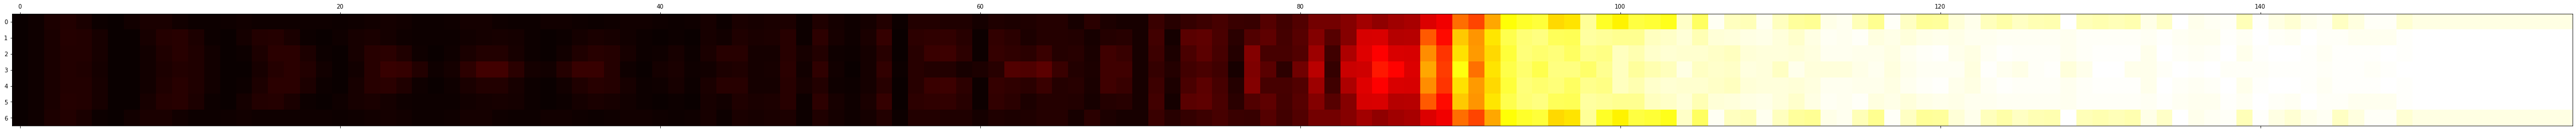

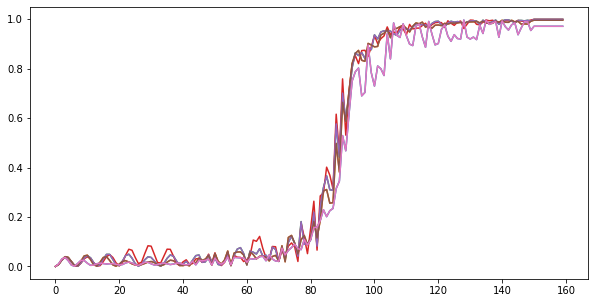

In [111]:
reg = Register.rectangle(1,7, spacing=3., prefix='q')
reg.draw()

# Parameters in MHz and ns
#U = 1 * 2*np.pi  # btw 1-3 Mhz*2pi. Should we include this VdW magnitude in an AFM-type Simulation?

delta_0 = -20 * 2*np.pi
delta_f = 20 * 2*np.pi
Omega_max = 2.0 * 2*np.pi  # btw 1.8-2 Mhz*2pi
t_rise = 40.
t_stop = 150.
t_end = 160.

#
hold = ConstantWaveform(t_rise, delta_0)
excite = RampWaveform(t_stop - t_rise, delta_0, delta_f)
sweep = Pulse.ConstantAmplitude(Omega_max, CompositeWaveform(hold, excite), 0.)
stay = Pulse.ConstantPulse(t_end - t_stop, 0., delta_f, 0.)

#
seq = Sequence(reg, Mock)
seq.declare_channel('ising', 'rydberg_global')

seq.add(sweep, 'ising')
seq.add(stay, 'ising')

#print(seq)
seq.draw()

simul = Simulation(seq)

#
up = qutip.basis(2,0)
def occupation(j):
    prod = [qutip.qeye(2) for _ in range(simul._size)]
    prod[j] = up*up.dag()
    return qutip.tensor(prod)
    
occup_list = [occupation(j) for j in range(simul._size)]

#
simul.run(obs_list=occup_list, progress_bar=True)

#
res = np.zeros((len(reg.qubits),int(t_end)))
for i,expv in enumerate(simul.output.expect):
    for t in range(int(t_end)):
        res[i,t] = expv[t] 
        
        
#
plt.figure(figsize=(80,50))
plt.matshow(res, cmap='hot', fignum=1)

#
plt.figure(figsize=(10,5))
for expv in simul.output.expect:
    plt.plot(expv)
    
plt.show()

# Rydberg Crystals: Z4 Order

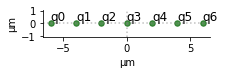

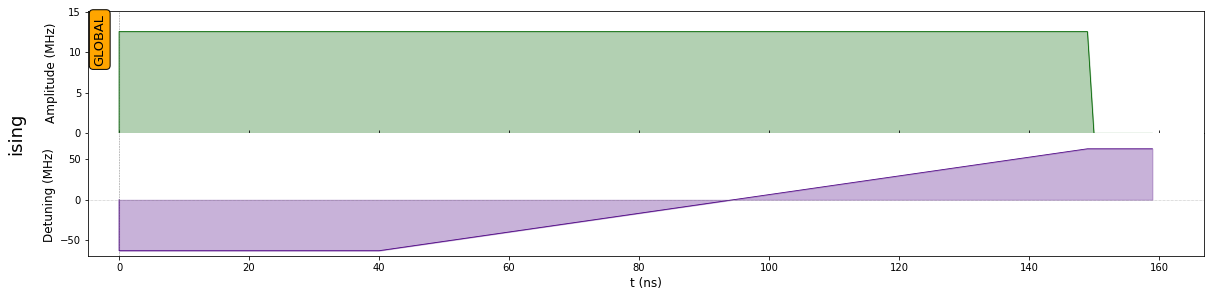

Observables provided. Calculating expectation value...
10.0%. Run time:   0.16s. Est. time left: 00:00:00:01
20.0%. Run time:   0.32s. Est. time left: 00:00:00:01
30.0%. Run time:   0.50s. Est. time left: 00:00:00:01
40.0%. Run time:   0.71s. Est. time left: 00:00:00:01
50.0%. Run time:   1.00s. Est. time left: 00:00:00:01
60.0%. Run time:   1.32s. Est. time left: 00:00:00:00
70.0%. Run time:   1.65s. Est. time left: 00:00:00:00
80.0%. Run time:   2.04s. Est. time left: 00:00:00:00
90.0%. Run time:   2.48s. Est. time left: 00:00:00:00
Total run time:   2.95s


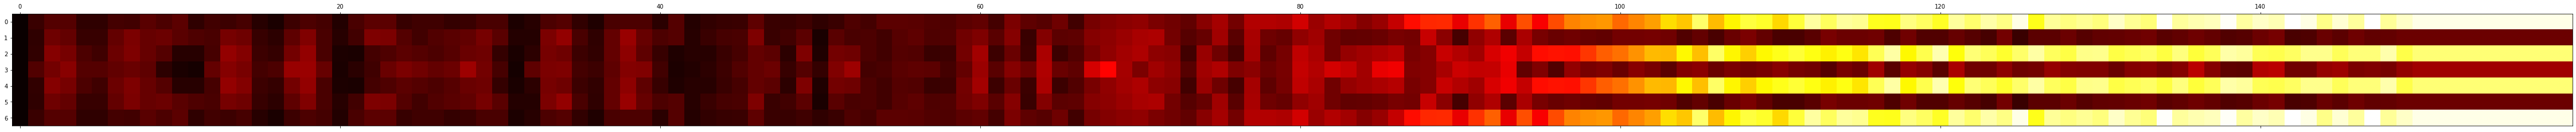

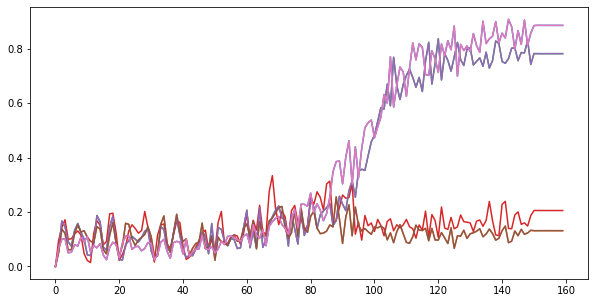

In [114]:
reg = Register.rectangle(1,7, spacing=2., prefix='q')
reg.draw()

# Parameters in MHz and ns
#U = 1 * 2*np.pi  # btw 1-3 Mhz*2pi. Should we include this VdW magnitude in an AFM-type Simulation?

delta_0 = -10 * 2*np.pi
delta_f = 10 * 2*np.pi
Omega_max = 2.0 * 2*np.pi  # btw 1.8-2 Mhz*2pi
t_rise = 40.
t_stop = 150.
t_end = 160.

#
hold = ConstantWaveform(t_rise, delta_0)
excite = RampWaveform(t_stop - t_rise, delta_0, delta_f)
sweep = Pulse.ConstantAmplitude(Omega_max, CompositeWaveform(hold, excite), 0.)
stay = Pulse.ConstantPulse(t_end - t_stop, 0., delta_f, 0.)

#
seq = Sequence(reg, Mock)
seq.declare_channel('ising', 'rydberg_global')

seq.add(sweep, 'ising')
seq.add(stay, 'ising')

#print(seq)
seq.draw()

simul = Simulation(seq)

#
up = qutip.basis(2,0)
def occupation(j):
    prod = [qutip.qeye(2) for _ in range(simul._size)]
    prod[j] = up*up.dag()
    return qutip.tensor(prod)
    
occup_list = [occupation(j) for j in range(simul._size)]

#
simul.run(obs_list=occup_list, progress_bar=True)

#
res = np.zeros((len(reg.qubits),int(t_end)))
for i,expv in enumerate(simul.output.expect):
    for t in range(int(t_end)):
        res[i,t] = expv[t] 
        
        
#
plt.figure(figsize=(80,50))
plt.matshow(res, cmap='hot', fignum=1)

#
plt.figure(figsize=(10,5))
for expv in simul.output.expect:
    plt.plot(expv)
    
plt.show()